In [10]:
import mapomatic as mm
from qiskit import QuantumCircuit
from qiskit import transpile, schedule
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import pulse
from qiskit.pulse.library import Gaussian, GaussianSquare, Drag
from qiskit.providers.fake_provider import FakeManila
from qiskit.visualization import plot_histogram
from qiskit.circuit import Gate, Parameter
import numpy as np
from qiskit_experiments.library import StateTomography


In [8]:
backend=FakeManila()

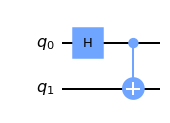

In [5]:
nq = 2
qc_ghz = QuantumCircuit(nq)
qc_ghz.h(0)
for i in range(1, nq):
    qc_ghz.cx(0, i)
qc_ghz.draw('mpl')

In [12]:
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()
state_result = qstdata1.analysis_results("state")

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_manila). The new backend will be used, but service is not changed if one already exists.


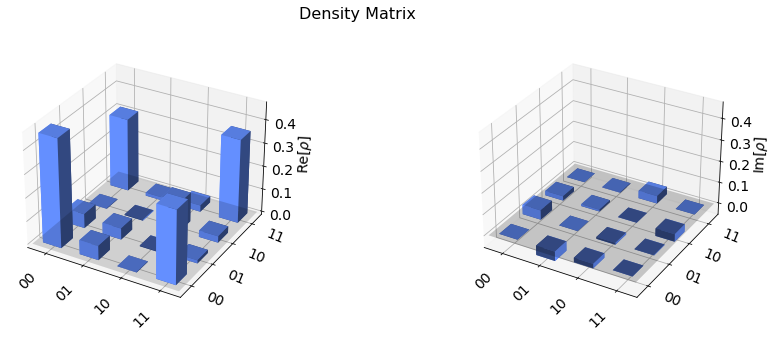

In [13]:
from qiskit.visualization import plot_state_city
plot_state_city(qstdata1.analysis_results("state").value, title='Density Matrix')

In [14]:
fid_result = qstdata1.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result.value))

State Fidelity = 0.72754


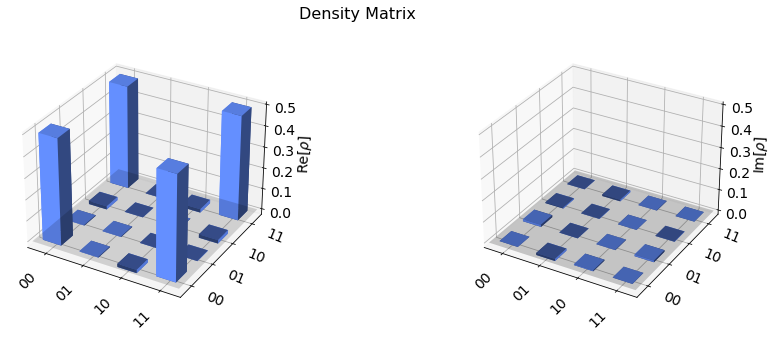

In [18]:
from qiskit import Aer
simulator=Aer.get_backend('aer_simulator')
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(simulator, seed_simulation=100).block_for_results()
state_result = qstdata1.analysis_results("state")
from qiskit.visualization import plot_state_city
plot_state_city(qstdata1.analysis_results("state").value, title='Density Matrix')